HOW TO Explore metwork
1. Depth-first search(DFS)
2. Breadth-first search(BFS)

<img src='/Users/david/Documents/STUDY/ML_Study-1/3. Graph Neural Network/image/스크린샷 2022-08-07 오후 4.30.16.png' width ='700' height = '370'>


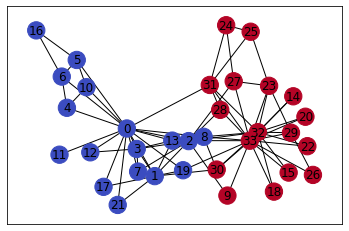

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from karateclub import Node2Vec
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


G = nx.karate_club_graph()

labels = []

for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0)

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color = labels, cmap = 'coolwarm')


## Perform node embedding using Node2Vac

In [13]:
n2vec_model = Node2Vec(walk_number=10, walk_length=80, p=0.6,q=0.4, dimensions=124) # p를 높이 주고 q를 낮출수록 local에 가중치를 더주어서 정확도가 높아짐
n2vec_model.fit(G)
embeding = n2vec_model.get_embedding()
print('Embeding array shape', embeding.shape)

Embeding array shape (34, 124)


## LOW dimensional plot of the nodes x features

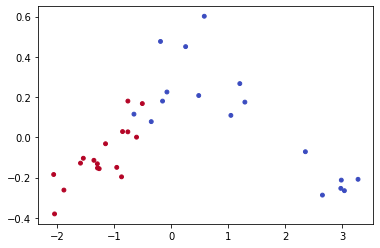

In [14]:
PCA_model = PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embeding)
lowdimension_embedding.shape
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1], c= labels, s=15,cmap='coolwarm')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(embeding, labels, test_size= 0.3)
ML_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_preds = ML_model.predict(X_test)
ML_acc = roc_auc_score(y_test, y_preds)
print('AUC:', ML_acc)

AUC: 0.9
